In [60]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

# Assignment 3

## 1 Q-function (Husimi) representation

### (a)

\begin{align}
\rho &= \left| \psi \right\rangle \left\langle \psi \right| \\
Q(\alpha) &= \frac{1}{\pi} \left\langle \alpha \left| \rho \right| \alpha \right\rangle \\
&= \frac{1}{\pi} \left\langle \left. \alpha \right| \psi \right\rangle \left\langle \left. \psi \right| \alpha \right\rangle \\
&= \frac{1}{\pi} \left| \left\langle \left. \alpha \right| \psi \right\rangle \right|^{2}
\end{align}

### (b)

#### Coherent state

The Q-function for a coherent state $\left|\beta\right\rangle$  is 

\begin{align}
Q_{\beta}\left(\alpha\right) &= \frac{1}{\pi} \exp\left(-\frac{\left|\alpha\right|^{2} + \left|\beta\right|^{2}}{2}\right) \left(\alpha\beta\right)^{n}
\end{align}


Text(0.5, 1.0, 'Q-function of a coherent state')

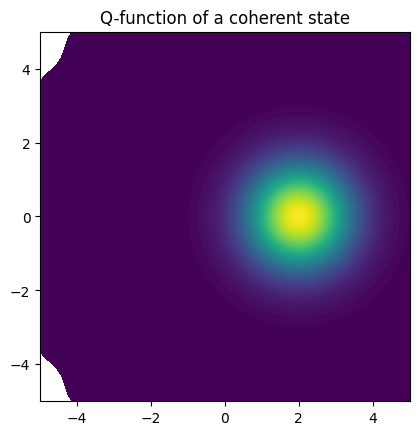

In [61]:
N_fock = 20
beta = np.sqrt(2)
rho_coherent = coherent_dm(N_fock, beta)

x = np.linspace(-5,5,200)
y = np.linspace(-5,5,200)
z = qfunc(rho_coherent, x, y)

fig, ax = plt.subplots()
cont = ax.contourf(x, y, z, 100)
plt.gca().set_aspect('equal', adjustable='box')
plt.title("Q-function of a coherent state")

#### Fock state

The coherent state is 

$$
\begin{align}
\left|\alpha\right\rangle &= \exp\left(-\frac{\left|\alpha\right|^{2}}{2}\right) \sum_{n=0}^{\infty} \frac{\alpha^{n}}{\sqrt{n!}} \left|n\right\rangle 
\end{align}
$$

So the Q-function for a Fock state is

$$
\begin{align}
Q_{n}(\alpha) &= \frac{1}{\pi} \exp\left(-\frac{\left|\alpha\right|^{2}}{2}\right) \frac{\left|\alpha\right|^{2n}}{\sqrt{n!}}
\end{align}
$$

Text(0.5, 1.0, 'Q-function of a Fock state')

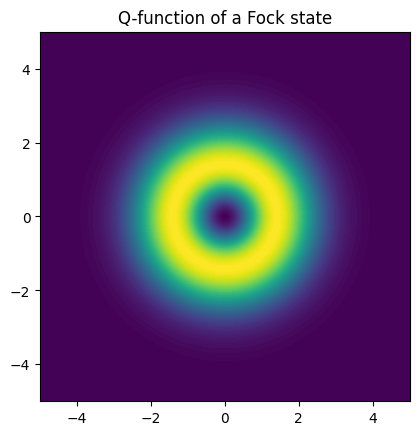

In [62]:
N_fock = 20
rho_coherent = fock_dm(N_fock, 1)

x = np.linspace(-5,5,200)
y = np.linspace(-5,5,200)
z = qfunc(rho_coherent, x, y)

fig, ax = plt.subplots()
cont = ax.contourf(x, y, z, 100)
plt.gca().set_aspect('equal', adjustable='box')
plt.title("Q-function of a Fock state")

### (c)

$$
\left|\psi\right\rangle =N\frac{1}{\sqrt{2}}\left(\left|\alpha^{\prime}\right\rangle +\left|-\alpha^{\prime}\right\rangle \right)
$$

I think we called this the "cat state" because it represents a superposition of two macroscopically different states. $N$ is in general not unity because the two states are not orthogonal.

Text(0.5, 1.0, 'Q-function of a cat state')

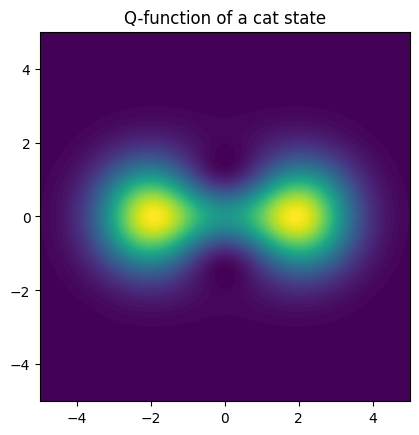

In [63]:
N_fock = 20  # Fock basis cutoff
N = 1
alpha = np.sqrt(2)
psi1 = coherent(N_fock, alpha)
psi2 = coherent(N_fock, -alpha)

x = np.linspace(-5,5,200)
y = np.linspace(-5,5,200)
z = qfunc(psi1 + psi2, x, y)

fig, ax = plt.subplots()
cont = ax.contourf(x, y, z, 100)
plt.gca().set_aspect('equal', adjustable='box')
plt.title("Q-function of a cat state")

## 3 Numerical exploration of the two-level system in the RWA

$$
H_{\text{RWA}}=-\frac{\hbar\delta}{2}\sigma_{z}-\frac{\hbar\Omega_{0}}{2}\sigma_{x}
$$

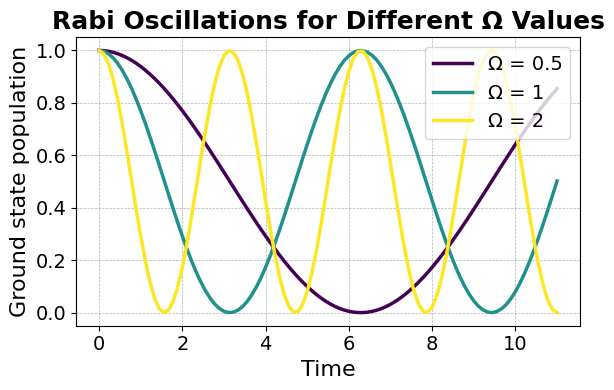

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

# Parameters
delta = 0
Omegas = [0.5, 1, 2]  # List of Omega values

# Initial state
psi0 = basis(2, 1)

# Operators
sm = sigmam()
sp = sigmap()
sx = sigmax()
sz = sigmaz()
gs_proj = basis(2, 1) * basis(2, 1).dag()

# Time vector
t = np.linspace(0, 11, 100)

# Prepare the plot
fig, ax = plt.subplots(figsize=(6, 4))
colors = plt.cm.viridis(np.linspace(0, 1, len(Omegas)))  # Using a colormap for a set of colors

# Loop over Omega values
for i, Omega in enumerate(Omegas):
    # Hamiltonian for the current value of Omega
    H = - delta / 2.0 * sz - Omega / 2.0 * sx

    # Solve the Schrodinger equation
    result = mesolve(H, psi0, t, [], [gs_proj])
    
    # Plot the expectation value for the current value of Omega
    ax.plot(t, result.expect[0], linewidth=2.5, color=colors[i], label=f'Ω = {Omega}')

# Set up the plot details
ax.set_xlabel('Time', fontsize=16)
ax.set_ylabel('Ground state population', fontsize=16)
ax.set_title('Rabi Oscillations for Different Ω Values', fontsize=18, fontweight='bold')
ax.tick_params(axis='both', which='major', labelsize=14)
ax.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.6)
ax.legend(fontsize=14, loc="upper right")  # Legend with larger font size
plt.tight_layout()  # Adjust the spacing
plt.show()


#

# Appendix

## Plotting the Q-function for a Fock state without QuTiP

C:\Users\chris\AppData\Local\Temp\ipykernel_14256\2764039031.py:11: UserWarning: The following kwargs were not used by contour: 'aspect'
  cont = ax.contourf(x, y, z, 100, aspect='equal')


Text(0.5, 1.0, 'Q-function of Fock state')

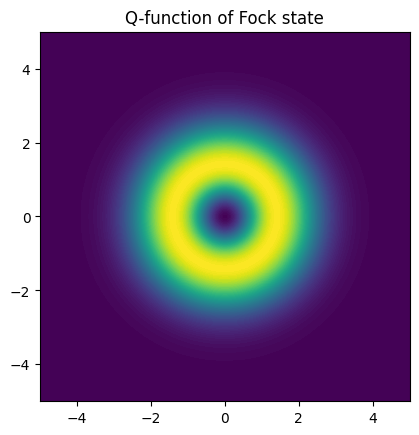

In [64]:
Q_fock = lambda alpha, n : 1 / np.pi * np.exp(-np.abs(alpha)**2 / 2) * (np.abs(alpha))**(2*n) / np.sqrt(np.math.factorial(n))

# Plotting the Q-function of a Fock state
n = 1
x = np.linspace(-5,5,100)
y = np.linspace(-5,5,100)
x, y = np.meshgrid(x, y)
z = Q_fock(x + 1j * y, n)

fig, ax = plt.subplots()
cont = ax.contourf(x, y, z, 100, aspect='equal')
plt.gca().set_aspect('equal', adjustable='box')
plt.title("Q-function of Fock state")